# Model Analysis

In [1]:
import os
# need to reload kernel between runs of this
os.chdir('genre_classification_289a/src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_utils import find_available_mlp_models, get_model_f1s, get_model_loss_histories, abbrev_targets

## Available MLP Models

In [3]:
# set possible file attrs
dataset_name = "fma_medium"
possible_targets = ["subgenres", "mfcc", "genre"]
possible_layers = [7,6,5,4]

mlp_models = find_available_mlp_models(dataset_name, possible_targets, possible_layers)
for model in mlp_models:
    print(model)

{'dataset': 'fma_medium', 'targets': ['subgenres'], 'layer': 7}
{'dataset': 'fma_medium', 'targets': ['subgenres'], 'layer': 6}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 7}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 6}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 5}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 4}


## Table of F1 (micro) Performance

In [4]:
mlp_f1s = get_model_f1s(mlp_models)

for idx, f1 in enumerate(mlp_f1s):
    print(f"{f1.round(4)} <= layer: {mlp_models[idx]['layer']}, targets: {mlp_models[idx]['targets']}")

0.8602 <= layer: 7, targets: ['subgenres']
0.8802 <= layer: 6, targets: ['subgenres']
0.9747 <= layer: 7, targets: ['subgenres', 'mfcc', 'genre']
0.9611 <= layer: 6, targets: ['subgenres', 'mfcc', 'genre']
0.7905 <= layer: 5, targets: ['subgenres', 'mfcc', 'genre']
0.6721 <= layer: 4, targets: ['subgenres', 'mfcc', 'genre']


## Plots of Losses

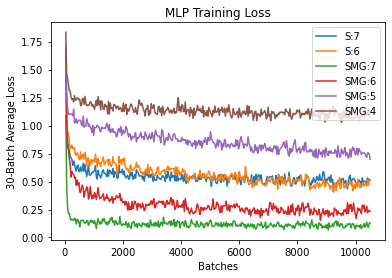

In [7]:
mlp_loss_histories = get_model_loss_histories(mlp_models)
batch_set_size = 30

plt.figure()
plt.title("MLP Training Loss")
for idx, mlp_loss_history in enumerate(mlp_loss_histories):
    label = f"{abbrev_targets(mlp_models[idx]['targets'])}:{mlp_models[idx]['layer']}"
    plt.plot((np.arange(len(mlp_loss_history))+1)*batch_set_size, mlp_loss_history, label=label)
plt.ylabel("30-Batch Average Loss")
plt.xlabel("Batches")
plt.legend()
plt.show()